In [2]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
games = pd.read_csv("games_of_all_time_original.csv")
games

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+
...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",https://www.metacritic.com/game/xbox/killswitch,Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,https://www.metacritic.com/game/pc/naild,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,https://www.metacritic.com/game/xbox-one/ooo-a...,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",https://www.metacritic.com/game/wii/udraw-studio,THQ,"['Miscellaneous', 'General']",NaN,E


In [3]:
games["platform"] = games["platform"].apply(eval)

def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
 
to_1D(games["platform"]).value_counts()

pc                  3108
playstation-4       1344
xbox-360            1015
switch               931
playstation-2        881
playstation-3        821
xbox-one             747
xbox                 484
ds                   453
wii                  398
psp                  325
gamecube             300
game-boy-advance     295
3ds                  246
playstation-vita     170
playstation          127
wii-u                123
playstation-5         90
dreamcast             80
xbox-series-x         49
nintendo-64           48
stadia                 3
dtype: int64

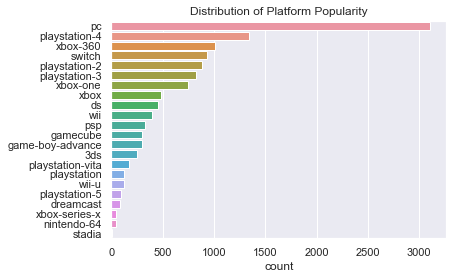

In [4]:
sns.set_theme(style = "darkgrid")
ax = sns.countplot(y = to_1D(games["platform"]), order = to_1D(games["platform"]).value_counts().index).set(title = "Distribution of Platform Popularity")
plt.savefig("platforms.png", bbox_inches = "tight", dpi = 150)

In [5]:
games["genre"] = games["genre"].fillna("[\'None\']")
games["genre"] = games["genre"].apply(eval)
to_1D(games["genre"]).value_counts()

Action              3125
General             2488
Action Adventure    1208
Shooter             1101
Role-Playing        1059
                    ... 
Bowling                2
Civilian Plane         2
Skating                1
Drag                   1
Tank                   1
Length: 169, dtype: int64

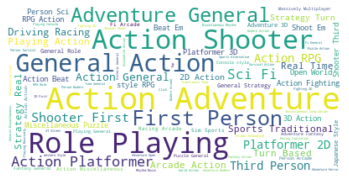

In [6]:
text = " ".join(to_1D(games["genre"]))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud_genres.png")

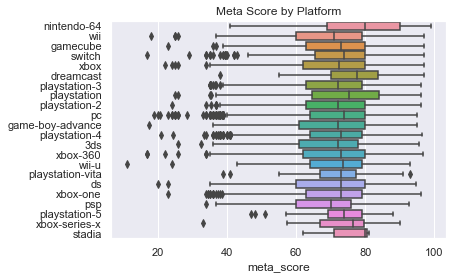

In [7]:
ax = sns.boxplot(x = games["meta_score"], y = to_1D(games["platform"])).set(title = "Meta Score by Platform")
plt.savefig("metascore_boxplot_platform.png", bbox_inches = "tight", dpi = 150)

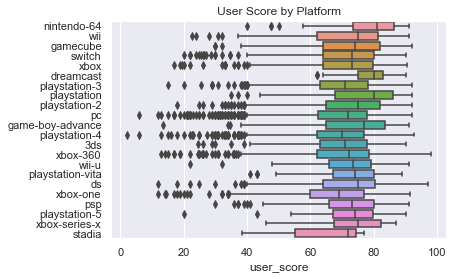

In [8]:
ax = sns.boxplot(x = games["user_score"], y = to_1D(games["platform"])).set(title = "User Score by Platform")
plt.savefig("userscore_boxplot_platform.png", bbox_inches = "tight", dpi = 150)

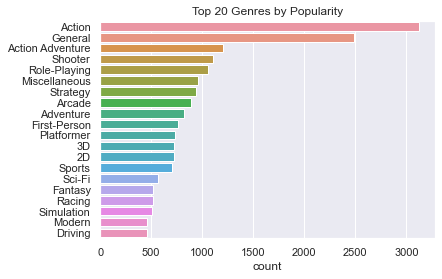

In [9]:
ax = sns.countplot(y = to_1D(games["genre"]), order = to_1D(games["genre"]).value_counts().iloc[:20].index).set(title = "Top 20 Genres by Popularity")
plt.savefig("top20genres.png", bbox_inches = "tight", dpi = 150)

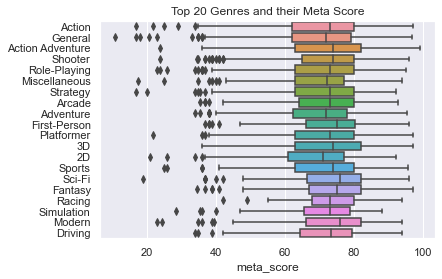

In [10]:
ax = sns.boxplot(x = games["meta_score"], y = to_1D(games["genre"]), order = to_1D(games["genre"]).value_counts().iloc[:20].index).set(title = "Top 20 Genres and their Meta Score")
plt.savefig("top20genresmetascore.png", bbox_inches = "tight", dpi = 150)

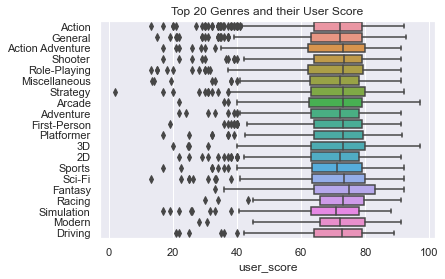

In [11]:
ax = sns.boxplot(x = games["user_score"], y = to_1D(games["genre"]), order = to_1D(games["genre"]).value_counts().iloc[:20].index).set(title = "Top 20 Genres and their User Score")
plt.savefig("top20genresuserscore.png", bbox_inches = "tight", dpi = 150)

In [12]:
fvalue, pvalue = stats.f_oneway(games['meta_score'][to_1D(games['platform']) == 'nintendo-64'],
                                games['meta_score'][to_1D(games['platform']) == 'wii'],
                                games['meta_score'][to_1D(games['platform']) == 'gamecube'],
                                games['meta_score'][to_1D(games['platform']) == 'switch'],
                                games['meta_score'][to_1D(games['platform']) == 'xbox'],
                                games['meta_score'][to_1D(games['platform']) == 'dreamcast'],
                                games['meta_score'][to_1D(games['platform']) == 'playstation-3'],
                                games['meta_score'][to_1D(games['platform']) == 'playstation'],
                                games['meta_score'][to_1D(games['platform']) == 'playstation-2'],
                                games['meta_score'][to_1D(games['platform']) == 'pc'],
                                games['meta_score'][to_1D(games['platform']) == 'game-boy-advance'],
                                games['meta_score'][to_1D(games['platform']) == 'playstation-4'],
                                games['meta_score'][to_1D(games['platform']) == '3ds'],
                                games['meta_score'][to_1D(games['platform']) == 'xbox-360'],
                                games['meta_score'][to_1D(games['platform']) == 'wii-u'],
                                games['meta_score'][to_1D(games['platform']) == 'playstation-vita'],
                                games['meta_score'][to_1D(games['platform']) == 'ds'],
                                games['meta_score'][to_1D(games['platform']) == 'xbox-one'],
                                games['meta_score'][to_1D(games['platform']) == 'psp'],
                                games['meta_score'][to_1D(games['platform']) == 'playstation-5'],
                                games['meta_score'][to_1D(games['platform']) == 'xbox-series-x'],
                                games['meta_score'][to_1D(games['platform']) == 'stadia'])

In [13]:
print(fvalue, pvalue)

3.6449821798073785 3.326165705322685e-08


In [14]:
fvalue, pvalue = stats.f_oneway(games['user_score'][to_1D(games['platform']) == 'nintendo-64'],
                                games['user_score'][to_1D(games['platform']) == 'wii'],
                                games['user_score'][to_1D(games['platform']) == 'gamecube'],
                                games['user_score'][to_1D(games['platform']) == 'switch'],
                                games['user_score'][to_1D(games['platform']) == 'xbox'],
                                games['user_score'][to_1D(games['platform']) == 'dreamcast'],
                                games['user_score'][to_1D(games['platform']) == 'playstation-3'],
                                games['user_score'][to_1D(games['platform']) == 'playstation'],
                                games['user_score'][to_1D(games['platform']) == 'playstation-2'],
                                games['user_score'][to_1D(games['platform']) == 'pc'],
                                games['user_score'][to_1D(games['platform']) == 'game-boy-advance'],
                                games['user_score'][to_1D(games['platform']) == 'playstation-4'],
                                games['user_score'][to_1D(games['platform']) == '3ds'],
                                games['user_score'][to_1D(games['platform']) == 'xbox-360'],
                                games['user_score'][to_1D(games['platform']) == 'wii-u'],
                                games['user_score'][to_1D(games['platform']) == 'playstation-vita'],
                                games['user_score'][to_1D(games['platform']) == 'ds'],
                                games['user_score'][to_1D(games['platform']) == 'xbox-one'],
                                games['user_score'][to_1D(games['platform']) == 'psp'],
                                games['user_score'][to_1D(games['platform']) == 'playstation-5'],
                                games['user_score'][to_1D(games['platform']) == 'xbox-series-x'],
                                games['user_score'][to_1D(games['platform']) == 'stadia'])

In [15]:
print(fvalue, pvalue)

8.972784642992513 1.5055610854813005e-28


In [16]:
fvalue, pvalue = stats.f_oneway(games['meta_score'][to_1D(games['genre']) == 'Action'],
                                games['meta_score'][to_1D(games['genre']) == 'General'],
                                games['meta_score'][to_1D(games['genre']) == 'Action Adventure'],
                                games['meta_score'][to_1D(games['genre']) == 'Shooter'],
                                games['meta_score'][to_1D(games['genre']) == 'Role-Playing'],
                                games['meta_score'][to_1D(games['genre']) == 'Miscellaneous'],
                                games['meta_score'][to_1D(games['genre']) == 'Strategy'],
                                games['meta_score'][to_1D(games['genre']) == 'Arcade'],
                                games['meta_score'][to_1D(games['genre']) == 'Adventure'],
                                games['meta_score'][to_1D(games['genre']) == 'First-Person'],
                                games['meta_score'][to_1D(games['genre']) == 'Platformer'],
                                games['meta_score'][to_1D(games['genre']) == '3D'],
                                games['meta_score'][to_1D(games['genre']) == '2D'],
                                games['meta_score'][to_1D(games['genre']) == 'Sports'],
                                games['meta_score'][to_1D(games['genre']) == 'Sci-Fi'],
                                games['meta_score'][to_1D(games['genre']) == 'Fantasy'],
                                games['meta_score'][to_1D(games['genre']) == 'Racing'],
                                games['meta_score'][to_1D(games['genre']) == 'Simulation'],
                                games['meta_score'][to_1D(games['genre']) == 'Modern'],
                                games['meta_score'][to_1D(games['genre']) == 'Driving'])

In [17]:
print(fvalue, pvalue)

2.8587549281520643 3.1493711178159526e-05


In [18]:
fvalue, pvalue = stats.f_oneway(games['user_score'][to_1D(games['genre']) == 'Action'],
                                games['user_score'][to_1D(games['genre']) == 'General'],
                                games['user_score'][to_1D(games['genre']) == 'Action Adventure'],
                                games['user_score'][to_1D(games['genre']) == 'Shooter'],
                                games['user_score'][to_1D(games['genre']) == 'Role-Playing'],
                                games['user_score'][to_1D(games['genre']) == 'Miscellaneous'],
                                games['user_score'][to_1D(games['genre']) == 'Strategy'],
                                games['user_score'][to_1D(games['genre']) == 'Arcade'],
                                games['user_score'][to_1D(games['genre']) == 'Adventure'],
                                games['user_score'][to_1D(games['genre']) == 'First-Person'],
                                games['user_score'][to_1D(games['genre']) == 'Platformer'],
                                games['user_score'][to_1D(games['genre']) == '3D'],
                                games['user_score'][to_1D(games['genre']) == '2D'],
                                games['user_score'][to_1D(games['genre']) == 'Sports'],
                                games['user_score'][to_1D(games['genre']) == 'Sci-Fi'],
                                games['user_score'][to_1D(games['genre']) == 'Fantasy'],
                                games['user_score'][to_1D(games['genre']) == 'Racing'],
                                games['user_score'][to_1D(games['genre']) == 'Simulation'],
                                games['user_score'][to_1D(games['genre']) == 'Modern'],
                                games['user_score'][to_1D(games['genre']) == 'Driving'])

In [19]:
print(fvalue, pvalue)

1.015855213356708 0.43792022582990964
